In [1]:
import pandas as pd
from scipy.io import arff
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

data, meta = arff.loadarff(r'C:\Users\gzmce\OneDrive - Firat University\Masaüstü\artificalGerekli\cure-t2-4k.arff')
df = pd.DataFrame(data)

In [2]:
pd.DataFrame(data)["class"].value_counts()

class
b'0'        1760
b'3'         600
b'4'         600
b'1'         400
b'2'         400
b'5'         240
b'noise'     200
Name: count, dtype: int64

In [3]:
print(df.columns)

Index(['x', 'y', 'class'], dtype='object')


In [4]:
from sklearn.preprocessing import StandardScaler

# Sayısal verileri al
X = np.column_stack((data['x'], data['y']))

# Standartlaştırma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
data_pd = pd.DataFrame(data)
data_pd["class"] = data_pd["class"].apply(lambda c : c.decode("utf-8"))
data_pd["class"] = data_pd["class"].apply(lambda c : int(c) if c != 'noise' else -1)
data_pd #classları sayısal yaptık.

,x,y,class
0,-0.590353,-0.566736,0
1,-0.147896,-0.257437,0
2,0.055418,-0.760445,0
3,-0.619365,-0.817190,0
4,-0.553720,-0.329719,0
...,...,...,...
4195,0.651146,-0.192620,-1
4196,0.633790,0.111288,-1
4197,0.413400,0.017708,-1
4198,0.942855,0.561410,-1


In [7]:
for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

X = df.iloc[:, [0, 1]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=6, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [8]:
from sklearn.metrics import normalized_mutual_info_score
normalized_mutual_info_score(data_pd["class"],y_kmeans) 

0.6987366512265977

In [14]:
import time

start = time.time()

kmeans = KMeans(n_clusters=6, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

end = time.time()
print(f"K-Means çalışma süresi: {end - start:.4f} saniye")

K-Means çalışma süresi: 0.0224 saniye


In [31]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

X = df.iloc[:, [0, 1]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

agg = AgglomerativeClustering(n_clusters=6)
labels_agg = agg.fit_predict(X_scaled)

In [32]:
normalized_mutual_info_score(data_pd["class"],labels_agg) 

0.7291107463227461

In [17]:
import time

start = time.time()

agg = AgglomerativeClustering(n_clusters=6)
labels_agg = agg.fit_predict(X_scaled)

end = time.time()
print(f"çalışma süresi: {end - start:.4f} saniye")

çalışma süresi: 0.5759 saniye


In [35]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Kategorik sütunları decode et (gerekliyse)
for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

# X ve Y özelliklerini al
X = df.iloc[:, [0, 1
               ]].values

# Standardizasyon
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN modelini oluştur
dbscan = DBSCAN(eps=0.2,min_samples=100)
labels = dbscan.fit_predict(X_scaled)

In [36]:
normalized_mutual_info_score(data_pd["class"],labels) 

0.6712493349632682

In [37]:
import time

start = time.time()


dbscan = DBSCAN(eps=0.2)
labels = dbscan.fit_predict(X_scaled)

end = time.time()
print(f"çalışma süresi: {end - start:.4f} saniye")

çalışma süresi: 0.0867 saniye


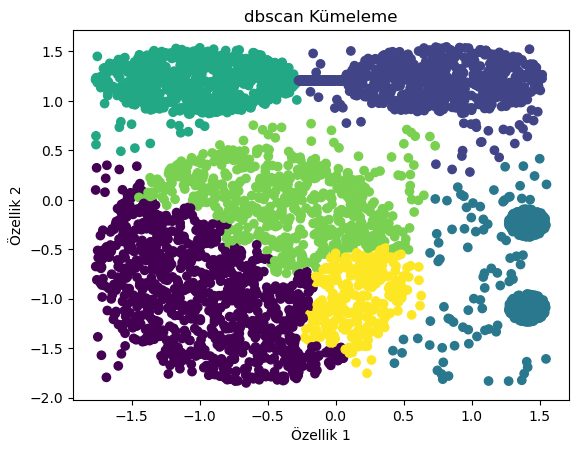

In [38]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_agg, cmap='viridis')
plt.title('dbscan Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

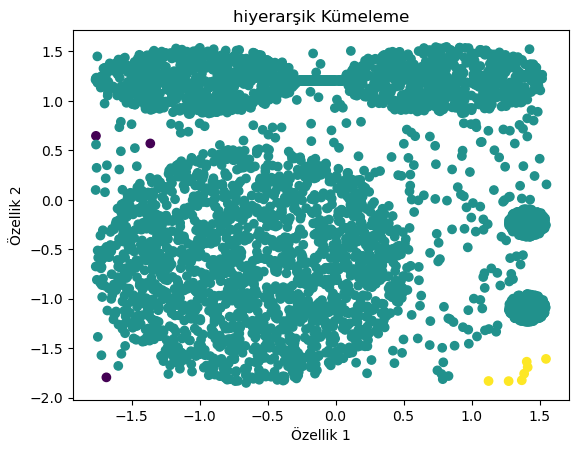

In [39]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title('hiyerarşik Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

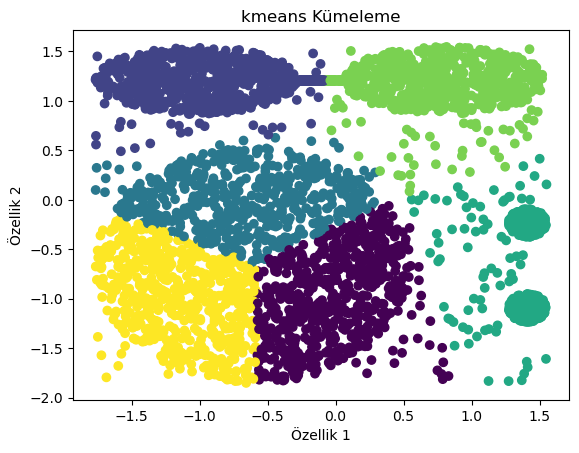

In [40]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis')
plt.title('kmeans Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

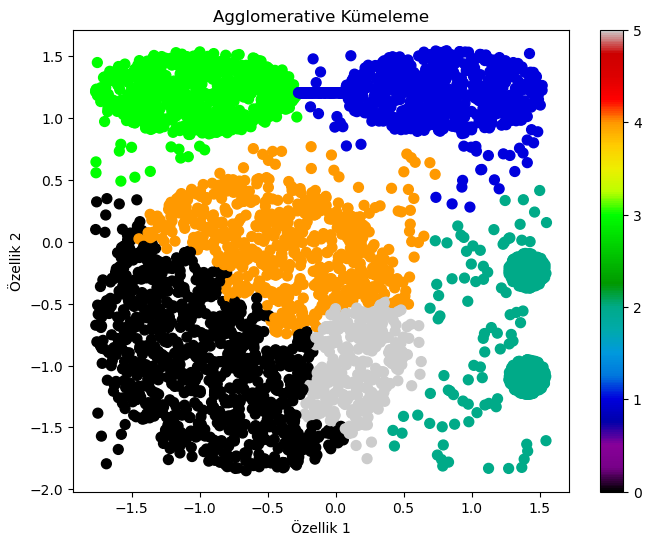

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_agg, cmap='nipy_spectral', s=50)
plt.title('Agglomerative Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.colorbar(ticks=range(31))  # Küme numaralarını gösteren renk barı
plt.show()
